<a href="https://colab.research.google.com/github/abhay0603/Calories_burnt/blob/main/calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing Data

In [210]:
dataset_1 = pd.read_csv('exercise.csv')
dataset_2 = pd.read_csv('calories.csv')
dataset = pd.concat([dataset_1,dataset_2.Calories],axis=1)
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Taking Care of Missing Data


In [211]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( missing_values= np.nan,strategy='mean')
imputer.fit(x[:,1:7])
x[:,1:7] = imputer.transform(x[:,1:7])

## Encoding Categorical Data


In [212]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

##Spliting dataset into the Training set and Testing set.

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


## Train Multilinear Regression

In [223]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [255]:
regressor.score(x_train,y_train)

0.9667002780593353

In [254]:
regressor.score(x_test,y_test)

0.969214323020104

##predicting test set

In [224]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 37.88  43.  ]
 [  4.06  15.  ]
 [110.99 101.  ]
 ...
 [ 28.11  29.  ]
 [150.92 150.  ]
 [146.45 157.  ]]


## Visualization

Text(0.5, 1.0, 'Atual Calories v/s Predicted Calories')

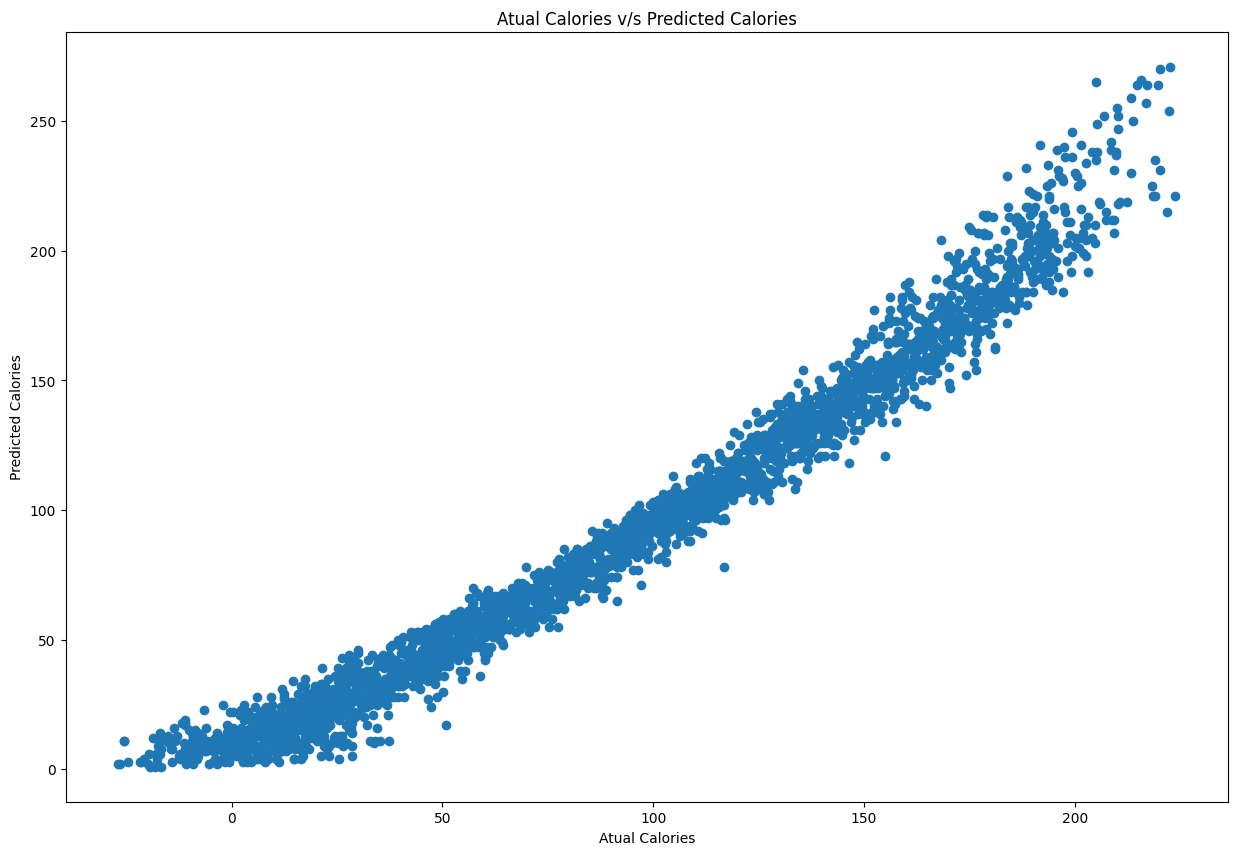

In [258]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred,y_test)
plt.xlabel('Atual Calories')
plt.ylabel('Predicted Calories')
plt.title('Atual Calories v/s Predicted Calories')


##R-Squared

In [226]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.969214323020104


## Mean-Squared-Error

In [227]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(mse)

118.79074609385695


## Root-Mean-Squared-Error

In [228]:
import math
rmse = math.sqrt(mse)
print(rmse)

10.899116757510994


## Adjusted R-Squared

In [229]:
n = len(y)
p = 1
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(adjusted_r_squared)

0.9692122703679518
